<a href="https://colab.research.google.com/github/JuanPoG/Tareas_Multimedia/blob/main/Actividad_2/Actividad_2_PobleteJuan_20521642_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 2</h2></center>
<center><h3>Fundamentos: Análisis espectral</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Juan Pablo Poblete</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Carga archivos y carga datos en python
<p align="justify">
Una de las tareas más importantes es la de cargar archivos que incluyan datos para el procesamiento.

<p align="justify">
Debes cargar los dos archivos en formato txt y CSV, adquirir los datos y presentarlos en graficos usando la librería Matplotlib
    
    

In [ ]:
!git clone https://github.com/Jorgecardenas1/EIE_401_MULTIMEDIA.git

Cloning into 'EIE_401_MULTIMEDIA'...
remote: Enumerating objects: 276, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 276 (delta 26), reused 40 (delta 11), pack-reused 219
Receiving objects: 100% (276/276), 9.18 MiB | 13.98 MiB/s, done.
Resolving deltas: 100% (120/120), done.


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/EIE_401_MULTIMEDIA/Actividades/Actividad 2/AbsorbanceTE_0-0.csv")
print(data)


     Freq [GHz]  AbsorbanceTE []
0          30.0         0.008415
1          30.1         0.009260
2          30.2         0.010222
3          30.3         0.011319
4          30.4         0.012576
..          ...              ...
596        89.6         0.054279
597        89.7         0.003677
598        89.8         0.002508
599        89.9         0.002696
600        90.0         0.003055

[601 rows x 2 columns]


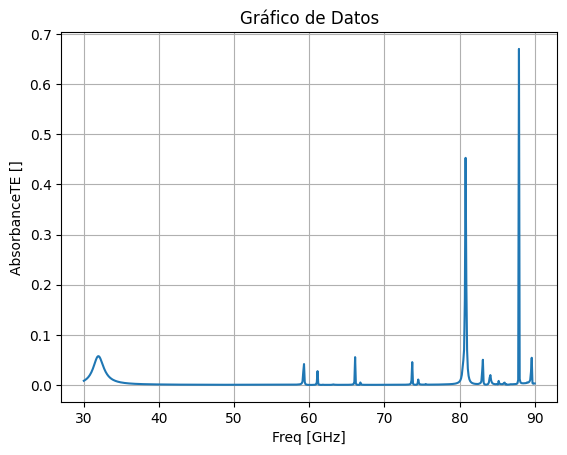

In [ ]:
import matplotlib.pyplot as plt

plt.plot(data['Freq [GHz]'], data['AbsorbanceTE []'])
plt.title('Gráfico de Datos')
plt.xlabel('Freq [GHz]')
plt.ylabel('AbsorbanceTE []')
plt.grid(True)
plt.show()



In [ ]:
import gzip

ruta_archivo_entrada = '/content/EIE_401_MULTIMEDIA/Actividades/Actividad 2/H-H1_GWOSC_16KHZ_R1-1268431079-32.txt.gz'
ruta_archivo_salida = '/content/EIE_401_MULTIMEDIA/Actividades/Actividad 2/H-H1_GWOSC_16KHZ_R1-1268431079-32.txt'

with gzip.open(ruta_archivo_entrada, 'rb') as f_in:
    with open(ruta_archivo_salida, 'wb') as f_out:
        f_out.write(f_in.read())

In [ ]:
archivo_txt = open('/content/EIE_401_MULTIMEDIA/Actividades/Actividad 2/H-H1_GWOSC_16KHZ_R1-1268431079-32.txt', 'r')
print(archivo_txt.read(200))

# Gravitational wave strain for GW200316_215756-v1 for H1 (see http://losc.ligo.org)
# This file has 16384 samples per second
# starting GPS 1268431079 duration 32
6.9866647593005026e-20
6.24534685389


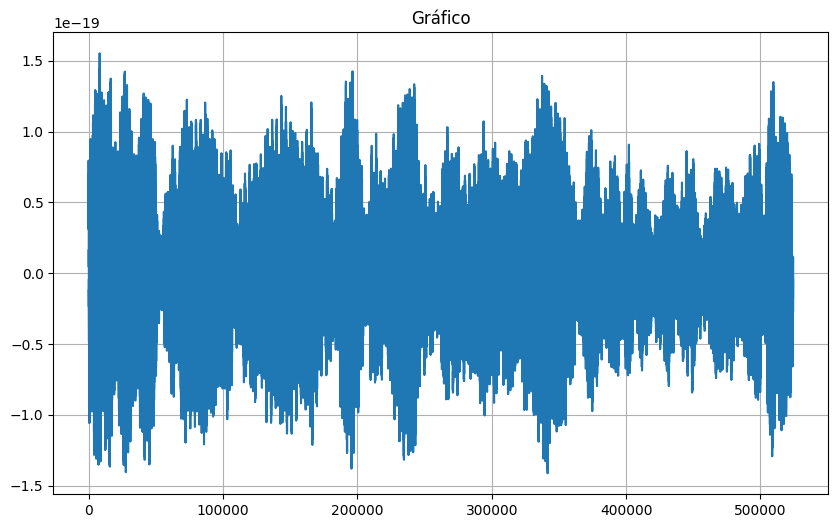

In [ ]:
y = []

with open('/content/EIE_401_MULTIMEDIA/Actividades/Actividad 2/H-H1_GWOSC_16KHZ_R1-1268431079-32.txt', 'r') as file:
    #Salta las primeras 4 líneas de texto
    for _ in range(3):
        next(file)

    #Lee y almacena los datos como float
    for linea in file:
        y.append(float(linea.strip()))

# Graficar datos
plt.figure(figsize=(10, 6))
plt.plot(y)
plt.title('Gráfico')
plt.grid(True)
plt.show()

## 2. Señal
<p align="justify">
Crea una señal continua (la suma de dos senoidales/cosenoidales, exponenciales) que utilizaras para las demostraciones siguientes. Presenta la función que usaste en una gráfica de tal forma que la ecuación esté incluida en dicha gráfica.

Incluye la ecuación en una celda de tu notebook usando LATEX.



Ecuaciones de señales que se sumaran:

$$f_1(t) =  sin(2\pi t)$$

$$f_2(t) =  sin(4\pi t)$$

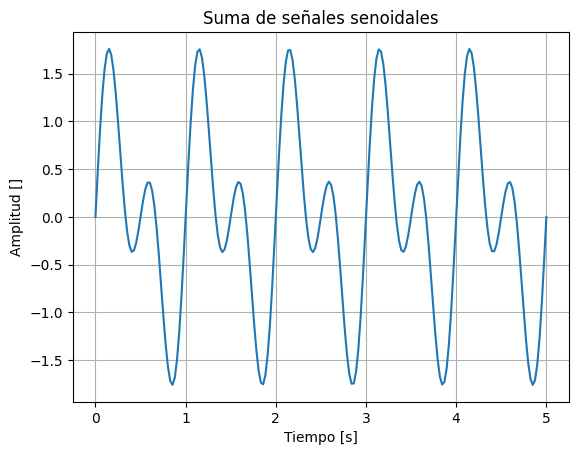

In [9]:
import numpy as np
import matplotlib.pyplot as plt

freq_1 = 1
freq_2 = 2
t = np.linspace(0,5,200)

fun_1 = np.sin(2*np.pi*freq_1*t)
fun_2 = np.sin(2*np.pi*freq_2*t)

sumFun = fun_1 + fun_2

plt.plot(t,sumFun)
plt.title('Suma de señales senoidales')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud []')
plt.grid()
plt.show()


## 3. Sampleo
<p align="justify">
En este punto debes comprobar como se da la operación de sampleo y que sucede ante cambios en el intervalo de sampleo.    


### 3.1 Crea una señal impulso (delta) y desplazala
Para esto puedes usar alguna librería de python

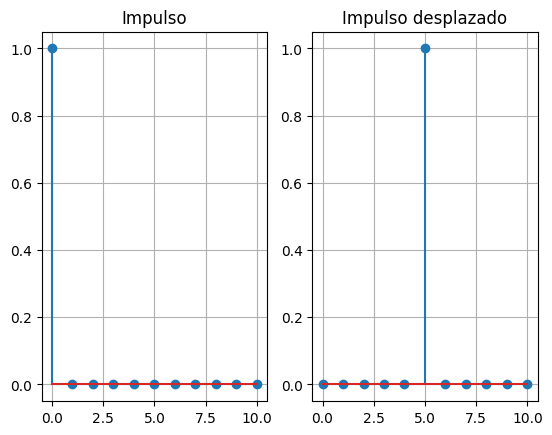

In [12]:
import numpy as np
import matplotlib.pyplot as plt

#señal impulso
sample = np.linspace(0,10,11) # cantidad de muestras en un rango
impulso = np.zeros(len(sample)) #vector de ceros
impulso[0]=1 # crea el impulso
ax=plt.subplot(1,2,1)
ax.stem(sample,impulso)
ax.set_title('Impulso')
ax.grid()

#señal impulso desplazada
impulso = np.zeros(len(sample))
impulso[5]=1
ax = plt.subplot(1,2,2)
ax.stem(sample,impulso)
ax.set_title('Impulso desplazado')
ax.grid()

### 3.2 Genere una señal Senoidal y realice la operación de sampleo
Puedes utilizar el método "stem" de matplotlib para plotear el resultado.

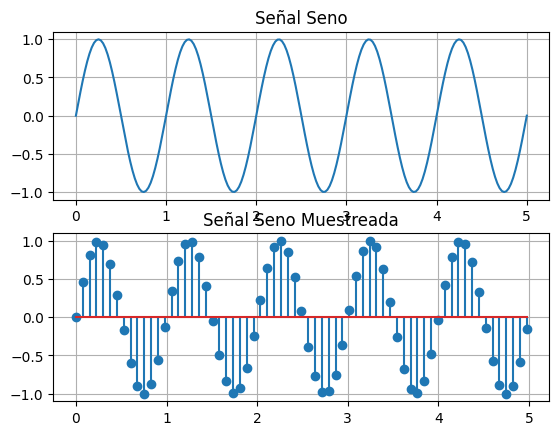

In [22]:
import numpy as np
import matplotlib.pyplot as plt

#señal senoidal
freq_1 = 1
t = np.linspace(0,5,200)
fun_1 = np.sin(2*np.pi*freq_1*t)
ax = plt.subplot(2,1,1)
ax.set_title('Señal Seno')
ax.plot(t,fun_1)
ax.grid()


# Muestrea la señal
factor_muestreo = 3  # espacio entre muestras respecto a vector t
t_muestreado = []
señal_muestreada = []

for i in range(0, len(t), factor_muestreo):
    t_muestreado.append(t[i])
    señal_muestreada.append(fun_1[i])# extrae muestras

ax1 = plt.subplot(2,1,2)
ax1.set_title('Señal Seno Muestreada')
ax1.stem(t_muestreado, señal_muestreada)
ax1.grid()


### 3.3 Genere una señal Triangular y realice la operación de sampleo

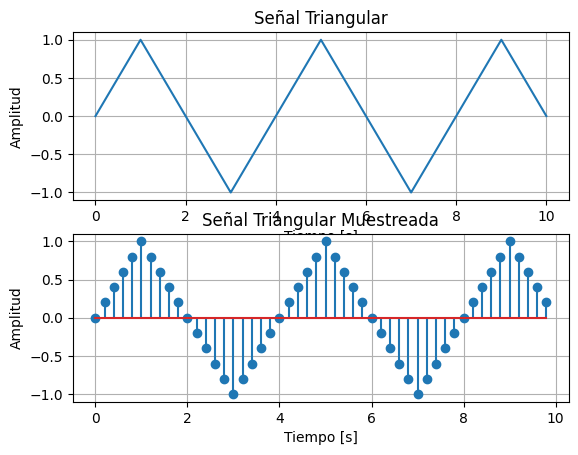

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
amplitud = 1.0  # Amplitud de la señal
frecuencia = 0.25  # Frecuencia de la señal
tiempo_total = 10.0  # Tiempo total de la señal
muestras_por_segundo = 1000  # Número de muestras por segundo

t = np.linspace(0, tiempo_total, int(tiempo_total * muestras_por_segundo), endpoint=False)

# Genera la señal triangular
senal_triangular = amplitud * np.abs((4 * frecuencia * t - 1) % 4 - 2) - amplitud

# Grafica la señal triangular
ax = plt.subplot(2,1,1)
ax.plot(t, senal_triangular,)
ax.set_title('Señal Triangular')
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Amplitud')
ax.grid(True)

# Muestrea la señal
factor_muestreo = 200
t_muestreado = []
señal_muestreada = []

for i in range(0, len(t), factor_muestreo):
    t_muestreado.append(t[i])
    señal_muestreada.append(senal_triangular[i])

ax1 = plt.subplot(2,1,2)
ax1.stem(t_muestreado, señal_muestreada)
ax1.set_title('Señal Triangular Muestreada')
ax1.set_xlabel('Tiempo [s]')
ax1.set_ylabel('Amplitud')
ax1.grid(True)


### 3.4 Realice la operación de sampleo sobre la señal que generaste en el punto 2

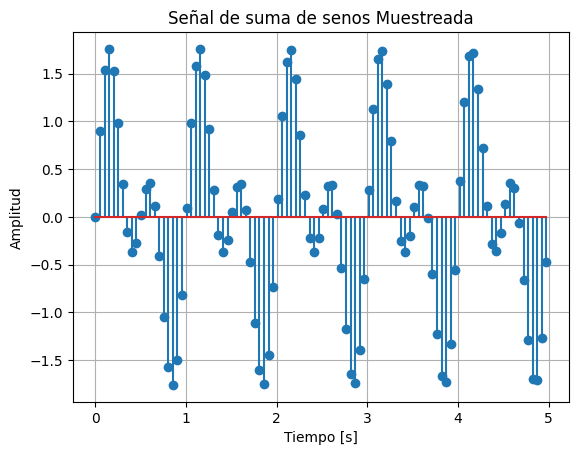

In [24]:
import numpy as np
import matplotlib.pyplot as plt

#señales
freq_1 = 1
freq_2 = 2
t = np.linspace(0,5,200)

fun_1 = np.sin(2*np.pi*freq_1*t)
fun_2 = np.sin(2*np.pi*freq_2*t)

#señales sumadas
sumFun = fun_1 + fun_2

# Muestrea la señal
factor_muestreo = 2
t_muestreado = []
señal_muestreada = []

for i in range(0, len(t), factor_muestreo):
    t_muestreado.append(t[i])
    señal_muestreada.append(sumFun[i])

plt.stem(t_muestreado, señal_muestreada)
plt.title('Señal de suma de senos Muestreada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

### 3.5 Compruebe el teorema de Nyquist
Para comprobarlo, debes evaluar algunos casos:
1. la frecuencia de sampleo _f_ es mayor que la frecuencia máxima de tu señal, Fmax.
2. la frecuencia de sampleo _f_ es mayor que 2*Fmax.
3. la frecuencia de sampleo _f_ es mayor que 5*Fmax.

<p align="justify">
Debe graficar:

1. la señal original.
2. la señal sampleada.
3. la señal reconstruida a partir del sampleo.

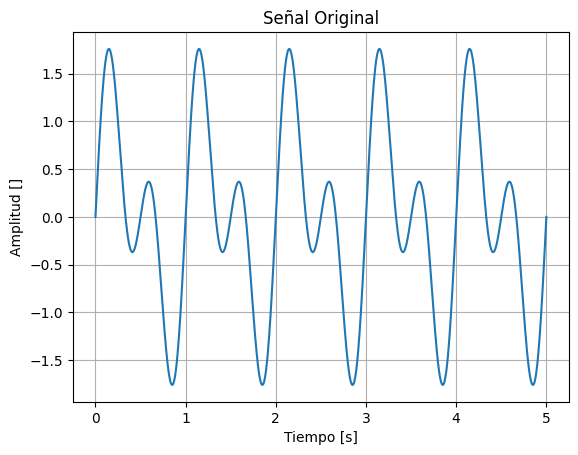

In [42]:
import numpy as np
import matplotlib.pyplot as plt

freq_1 = 1
freq_2 = 2
t = np.linspace(0,5,1000)

fun_1 = np.sin(2*np.pi*freq_1*t)
fun_2 = np.sin(2*np.pi*freq_2*t)

sumFun = fun_1 + fun_2

plt.plot(t,sumFun)
plt.title('Señal Original')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud []')
plt.grid()
plt.show()

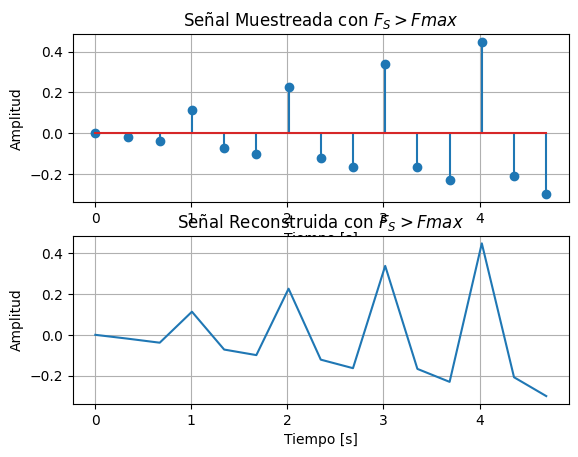

In [46]:
factor_muestreo = 67
t_muestreado = []
señal_muestreada = []

for i in range(0, len(t), factor_muestreo):
    t_muestreado.append(t[i])
    señal_muestreada.append(sumFun[i])

ax = plt.subplot(2,1,1)
ax.stem(t_muestreado, señal_muestreada)
ax.set_title('Señal Muestreada con $F_S>Fmax$')
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Amplitud')
ax.grid(True)

ax = plt.subplot(2,1,2)
ax.plot(t_muestreado, señal_muestreada)
ax.set_title('Señal Reconstruida con $F_S>Fmax$')
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Amplitud')
ax.grid(True)

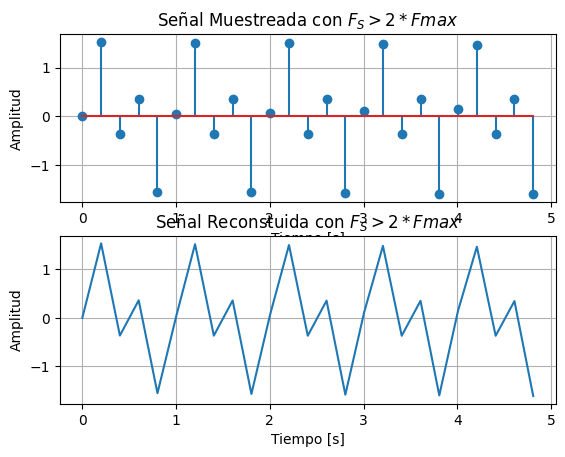

In [40]:
factor_muestreo = 20
t_muestreado = []
señal_muestreada = []

for i in range(0, len(t), factor_muestreo):
    t_muestreado.append(t[i])
    señal_muestreada.append(sumFun[i])

ax = plt.subplot(2,1,1)
ax.stem(t_muestreado, señal_muestreada)
ax.set_title('Señal Muestreada con $F_S>2*Fmax$')
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Amplitud')
ax.grid(True)

ax = plt.subplot(2,1,2)
ax.plot(t_muestreado, señal_muestreada)
ax.set_title('Señal Reconstuida con $F_S>2*Fmax$')
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Amplitud')
ax.grid(True)

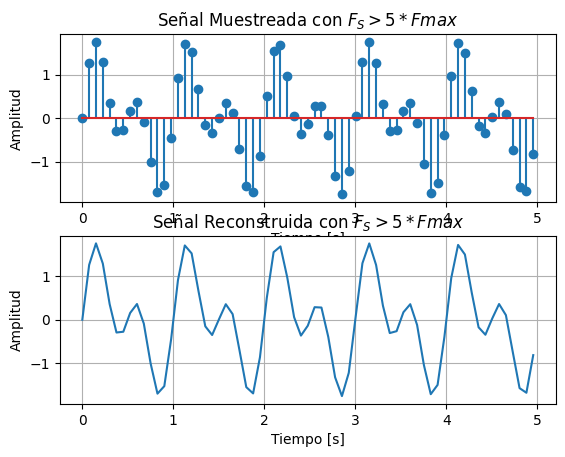

In [47]:
factor_muestreo = 15
t_muestreado = []
señal_muestreada = []

for i in range(0, len(t), factor_muestreo):
    t_muestreado.append(t[i])
    señal_muestreada.append(sumFun[i])

ax = plt.subplot(2,1,1)
ax.stem(t_muestreado, señal_muestreada)
ax.set_title('Señal Muestreada con $F_S>5*Fmax$')
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Amplitud')
ax.grid(True)

ax = plt.subplot(2,1,2)
ax.plot(t_muestreado, señal_muestreada)
ax.set_title('Señal Reconstruida con $F_S>5*Fmax$')
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Amplitud')
ax.grid(True)

### 3.6 Explica tus hallazgos

se puede observar que para poder reconstruir una señal, esta debe ser muestreada por lo menos un poco mas del doble de la frecuencia mas alta de la señal, pero hay que tener cuidado con esto, ya que es el punto minimo para poder muestrear, y para algunas señales puede no ser suficiente, por lo que habra que aumentar la frecuenciua de muestreo por una aun mayor.

## 4. Referencias
<p align="justify">
    

[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py